In [1]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

### Joining datasets, balancing samples and checking for missing/duplicate data

In [2]:
white_df = pd.read_csv('winequality-white.csv', sep=';')
white_df['type'] = 0 #White wine
white_df = white_df.drop_duplicates()
red_df = pd.read_csv('winequality-red.csv', sep=';')
red_df['type'] = 1 #Red wine
red_df = red_df.drop_duplicates()


In [3]:
red_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
 12  type                  1359 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 148.6 KB


In [4]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3961 non-null   float64
 1   volatile acidity      3961 non-null   float64
 2   citric acid           3961 non-null   float64
 3   residual sugar        3961 non-null   float64
 4   chlorides             3961 non-null   float64
 5   free sulfur dioxide   3961 non-null   float64
 6   total sulfur dioxide  3961 non-null   float64
 7   density               3961 non-null   float64
 8   pH                    3961 non-null   float64
 9   sulphates             3961 non-null   float64
 10  alcohol               3961 non-null   float64
 11  quality               3961 non-null   int64  
 12  type                  3961 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 433.2 KB


In [5]:
n_samples = len(red_df)
white_samples_df = white_df.sample(n=n_samples, random_state=42)

In [6]:
wine_df = pd.concat([white_samples_df, red_df], axis=0).reset_index(drop=True)

In [7]:
print(len(wine_df[wine_df['type']==0]))
print(len(wine_df[wine_df['type']==1]))

1359
1359


In [8]:
wine_df = wine_df.drop_duplicates().reset_index(drop=True)

In [9]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.2,0.320,0.47,5.1,0.044,19.0,65.0,0.99100,3.03,0.41,12.6,4,0
1,9.7,0.240,0.45,1.2,0.033,11.0,59.0,0.99260,2.74,0.47,10.8,6,0
2,7.2,0.270,0.74,12.5,0.037,47.0,156.0,0.99810,3.04,0.44,8.7,5,0
3,4.8,0.340,0.00,6.5,0.028,33.0,163.0,0.99390,3.36,0.61,9.9,6,0
4,5.0,0.170,0.56,1.5,0.026,24.0,115.0,0.99060,3.48,0.39,10.8,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
2714,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
2715,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
2716,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [10]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000,2718.000000
mean,7.578422,0.406536,0.302351,4.209308,0.066943,25.496137,92.890912,0.995251,3.254930,0.573528,10.505908,5.730316,0.500000
std,1.566529,0.192682,0.165905,3.852737,0.043769,17.588921,60.165833,0.002782,0.164096,0.168228,1.151619,0.870597,0.500092
min,4.200000,0.100000,0.000000,0.700000,0.009000,1.000000,6.000000,0.987130,2.740000,0.250000,8.000000,3.000000,0.000000
25%,6.600000,0.260000,0.210000,1.800000,0.042000,12.000000,38.000000,0.993243,3.140000,0.460000,9.500000,5.000000,0.000000
50%,7.200000,0.360000,0.300000,2.400000,0.059000,23.000000,90.000000,0.995620,3.250000,0.550000,10.300000,6.000000,0.500000
75%,8.200000,0.537500,0.400000,5.237500,0.080000,35.000000,136.000000,0.997200,3.360000,0.650000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.000000,23.500000,0.611000,289.000000,440.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [11]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

### Checking correlation of variables and generating understanding graph


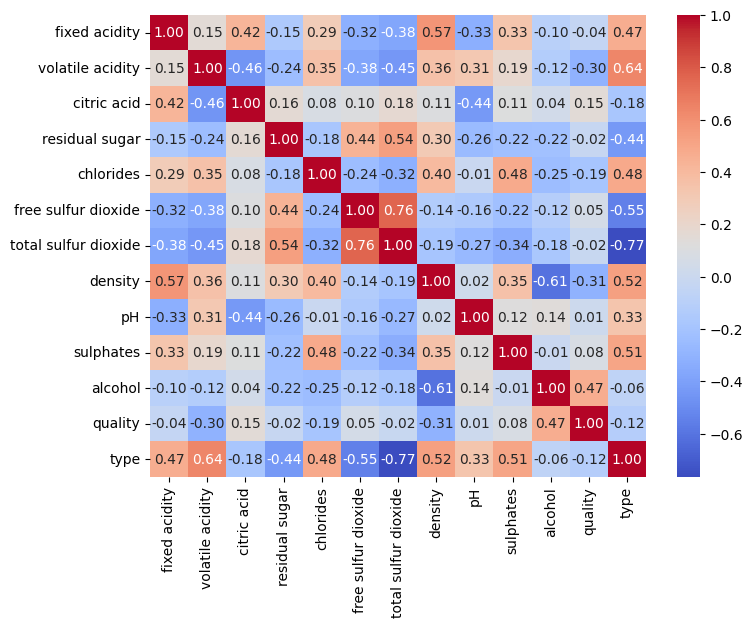

In [12]:
mat_corr = wine_df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(data=mat_corr, annot=True, fmt=".2f", cmap='coolwarm');


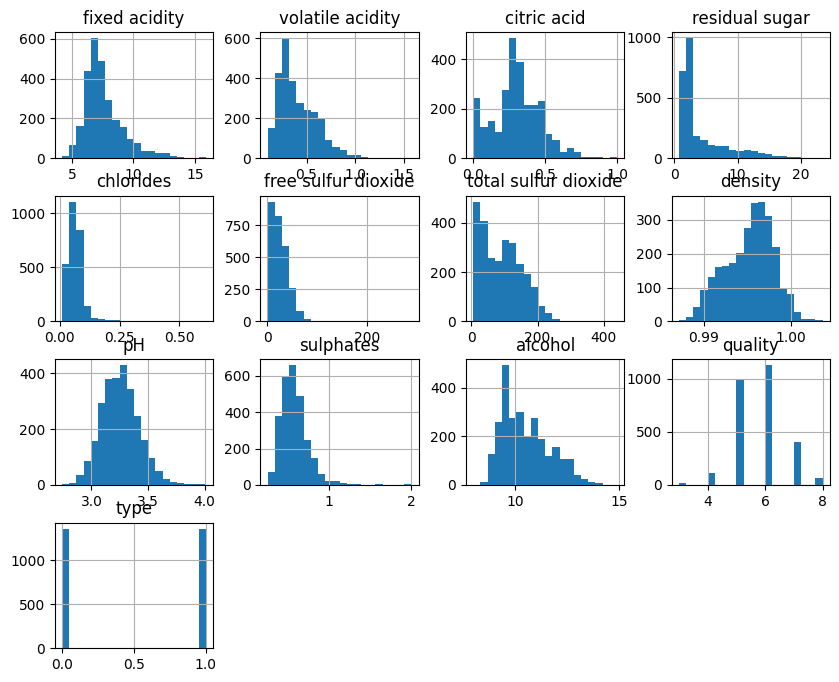

In [13]:
wine_df.hist(figsize=(10, 8), bins=20);

### Data pre-processing


#### Standardizing data scale


In [14]:
scaled_wine_df = wine_df.copy()
columns = scaled_wine_df.columns[:-1:]
scaler = StandardScaler()

scaled_wine_df[columns] = scaler.fit_transform(scaled_wine_df[columns])


In [15]:
scaled_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,-0.241611,-0.449196,1.010697,0.231227,-0.524276,-0.369399,-0.463653,-1.528298,-1.370974,-0.972241,1.818724,-1.987871,0
1,1.354567,-0.864465,0.890124,-0.781227,-0.775643,-0.824315,-0.563395,-0.953079,-3.138555,-0.615517,0.255420,0.309825,0
2,-0.241611,-0.708739,2.638433,2.152293,-0.684237,1.222805,1.049112,1.024237,-1.310023,-0.793879,-1.568435,-0.839023,0
3,-1.773942,-0.345379,-1.822769,0.594672,-0.889901,0.426703,1.165479,-0.485714,0.640413,0.216839,-0.526232,0.309825,0
4,-1.646248,-1.227825,1.553276,-0.703346,-0.935605,-0.085077,0.367537,-1.672103,1.371826,-1.091149,0.255420,1.458674,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,-0.497000,1.108061,-1.340477,-0.599505,0.024163,0.142381,-0.912495,0.452613,1.006119,1.465373,-0.873633,0.309825,1
2714,-0.880083,1.004244,-1.340477,-0.573544,0.526899,0.369838,-0.812752,-0.126202,1.188972,0.038477,-0.005131,-0.839023,1
2715,-1.071624,0.744701,-1.219904,-0.521623,-0.112947,0.767889,-0.696386,-0.047109,1.615630,1.108649,0.602821,0.309825,1
2716,-1.071624,1.237832,-1.099331,-0.573544,0.184124,0.369838,-0.812752,0.078720,1.920386,0.811379,-0.265681,-0.839023,1


### Separating in training test


In [16]:
X = scaled_wine_df.drop(['type'], axis=1)

y = scaled_wine_df[['type']]

In [17]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.241611,-0.449196,1.010697,0.231227,-0.524276,-0.369399,-0.463653,-1.528298,-1.370974,-0.972241,1.818724,-1.987871
1,1.354567,-0.864465,0.890124,-0.781227,-0.775643,-0.824315,-0.563395,-0.953079,-3.138555,-0.615517,0.255420,0.309825
2,-0.241611,-0.708739,2.638433,2.152293,-0.684237,1.222805,1.049112,1.024237,-1.310023,-0.793879,-1.568435,-0.839023
3,-1.773942,-0.345379,-1.822769,0.594672,-0.889901,0.426703,1.165479,-0.485714,0.640413,0.216839,-0.526232,0.309825
4,-1.646248,-1.227825,1.553276,-0.703346,-0.935605,-0.085077,0.367537,-1.672103,1.371826,-1.091149,0.255420,1.458674


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42, stratify=y)

### Training models and validating results with cross_validation



In [19]:
def evaluate_model(model_name, y_test, y_pred):
    print(f"\n{model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

##### Random forest

In [20]:
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)
y_rf = rf_model.predict(X_test)
evaluate_model('Random Forest', y_test, y_rf)

c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest
Accuracy: 0.9889705882352942
Precision: 0.9889970262233035
Recall: 0.9889705882352942
F1 Score: 0.988970439154941


In [ ]:
scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy') #cv=5: divides the data set into 5 parts (folds).
print("CV Accuracy Mean:", scores.mean()) #average accuracy across the 5 folds
print("CV Accuracy Std:", scores.std()) #model performance variation - lower is better

c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConvers

CV Accuracy Mean: 0.988223106922327
CV Accuracy Std: 0.009144513731444122


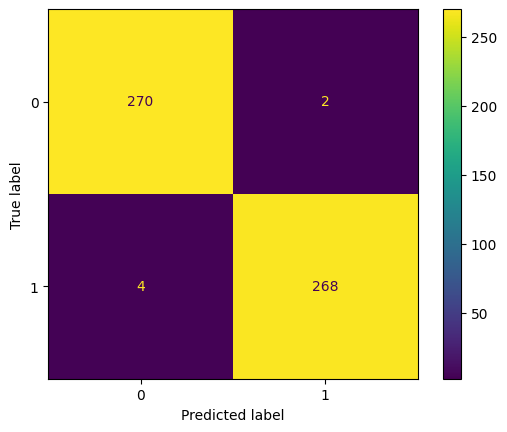

In [ ]:
cm = confusion_matrix(y_test, y_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

##### Logistic Regression

In [23]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_lr = lr_model.predict(X_test)
evaluate_model('Logistic Regression', y_test, y_lr)


Logistic Regression
Accuracy: 0.9908088235294118
Precision: 0.9908154576051257
Recall: 0.9908088235294118
F1 Score: 0.9908087924713196


c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print("CV Accuracy Mean:", scores.mean())
print("CV Accuracy Std:", scores.std()) 

CV Accuracy Mean: 0.9911690228577619
CV Accuracy Std: 0.003170576701726106


c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\j-mar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataC

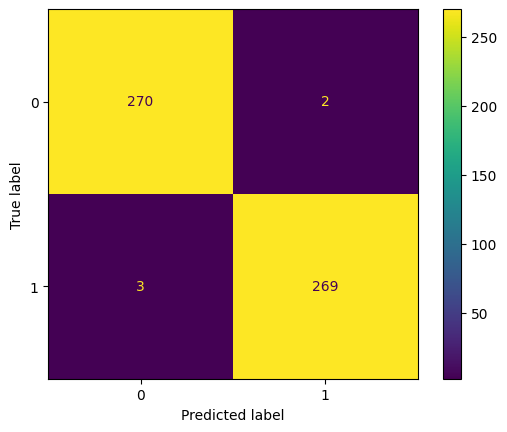

In [ ]:
cm = confusion_matrix(y_test, y_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();